<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Nguyen Doan Dai<br>Antoine Kitten</center>
<br>
<center><i>Based on Notebooks created by Aline Lefebvre-Lepot</i></center>

<h1>
    <center>Final project<br>
    <center>Approximation of periodic functions
</h1>

<div markdown=1 class=Abstract> This project is dedicated to the study of approximating periodic functions by the mean of using a system of well-behaved periodict functions and in particular Fourier series. First, we investigate how Fourier series are constructed, both intuitvely and rigously. Then, we construct suitable tools to calculate the Fourier series, which allows us to study the coefficient in the series. Given that the series itself in many cases converges to the considered function and that the

## Table of contents

- [Introduction](#intro)
- [Fourier series](#Fourier)
    - [Construction: Real analysis approach](#Fourier-RealAnalysis)
    - [Construction: Linear algebra approach](#Fourier-LinearAlgebra)
    - [Convergence and Gibbs phenomenon](#Fourier-Convergence)
    - [Bound on Fourier coefficients and Error of estimate](#Fourier-ErrorEstimate)
- [Fourier-Legendre series](#Fourier-Legendre)
- [Trigonometric interpolation](#Trig)
    - [General trigonometric polynomial](#Trig-General)
    - [Runge phenomenon and Chebyshev polynomials](#Trig-Chebyshev)
    - [Discrete Cosine Transform](#Trig-DCT)
- [Application](#App)
- [Appendix: Inner product and Norm](#Appendix)
    - [Inner product](#Appendix-InnerProd)
    - [Norm](#Appendix-Norm)
    - [Orthogonal projection](#Appendix-OrthoProj)
    - [Gram-Schmidt process](#Appendix-GramSchmidt)
    - [Infinite orthonormal system](#Appendix-InfOrtho)

In [3]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing

from scipy.integrate import quad_vec    # integration
from scipy.special import eval_legendre # Legendre polynomial
from scipy.fftpack import dct, idct     # discrete cosine transform, inverse discrete cosine transform

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<img src="figures/Fourier.jpg" alt="Fourier" style="width: 300px;" />

> **Joseph Fourier**, in full Jean-Baptiste-Joseph, Baron Fourier, (born March 21, 1768, Auxerre, France—died May 16, 1830, Paris), French mathematician, known also as an Egyptologist and administrator, who exerted strong influence on mathematical physics through his *Théorie analytique de la chaleur* (1822; The Analytical Theory of Heat). He showed how the conduction of heat in solid bodies may be analyzed in terms of infinite mathematical series now called by his name, the Fourier series. Far transcending the particular subject of heat conduction, his work stimulated research in mathematical physics, which has since been often identified with the solution of boundary-value problems, encompassing many natural occurrences such as sunspots, tides, and the weather. His work also had a great influence on the theory of functions of a real variable, one of the main branches of modern mathematics. (source: britannica.com)

<a id="intro"></a>
## Introduction

To fully appreciate the beauty of Fourier series, one must go back to Fourier's work on heat equation, specifically on how heat is distributed over time.

Consider an environment, such as a metal rod, metal plate, etc., which, for the sake of simplicity, is considered to be on 1-dimensional real line. Let $T(x, t)$ be the temperature of the point $x$ at time $t$, 2<sup>nd</sup> law of thermondynamics states that the change in temperature $\frac{\partial T}{\partial t} (x, t)$ is porportional to the difference in temperature of the point with one of its neighborhood $\frac{\partial^2 T}{\partial x^2} (x, t)$, i.e
\begin{equation*}
\frac{\partial T}{\partial t} (x, t) = \alpha \cdot \frac{\partial^2 T}{\partial x^2} (x, t) 
\label{eq:heat_eq} \tag{1}
\end{equation*}
where $\alpha \in \mathbb{R}$ represents thermal conductivity of the inbetween material. A first glance through the equation, one may immediately see a trivial solution where $T$ is a constant function
$$
    T(x, t) = c
$$
where $c \in \mathbb{R}$.

Those who are familiar with theory of harmonic oscillator in Physics may recognize a similar ordinary equation $\frac{d^2f}{dx^2} = \alpha f$, where the solution is given by $f = A \cos(\omega x) + B \sin(\omega x)$ with $\omega = \sqrt{-\alpha}$. This hints a class of solution to $\eqref{eq:heat_eq}$
$$
T(x, t) = \sin(r x) e^{-r^2 \alpha t} \text { and } T(x, t) = \cos(r x) e^{-r^2 \alpha t}
$$
where $r \in \mathbb{R}$.
Moreover, the linearity of heat equation implies that a linear combination of functions of the form above is also a solution to $\eqref{eq:heat_eq}$.

Now, consider the problem of finding $T$ satisfying an arbitrarily given initial condition $T(x, 0)$, what Fourier did was to ask if one can approximate $T$ using a linear combination of functions of the form $\sin(r x) e^{-r^2 \alpha t}$ and $\cos(r x) e^{-r^2 \alpha t}$ where $r \in \mathbb{R}$. To be more explicity, consider such linear combination, one obtains
$$
T(x, 0) = a_0 + \sum_{n = 1}^{\infty} \left(a_n \cos(n x) + b_n \sin(n x)\right)
$$
where $a_0, a_i, b_i \in \mathbb{R}$ for $i \in \mathbb{N}^*$. Yet, the fact that $\cos$ and $\sin$ are $2\pi$-periodic implies that $T(x, 0)$ is also $2\pi$-periodic. Within the context of heat equation, this means the temperature is only initial defined on some interval of length $2\pi$, and otherwise undetermined.

<a id="Fourier"></a>
## Fourier series

From now on, for the sake of consistency with the given guideline, we consider a function $f : \mathbb{R} \mapsto \mathbb{R}$ being integrable, $2\pi$-periodic and having the Fourier series of the form
$$
\mathscr{F}(f)(x) = a_0 + 2\sum_{k = 1}^{\infty} \left(a_k \cos(k x) + b_n \sin(k x)\right)
$$
as well as its partial sum
$$
\mathscr{F}_n(f)(x) = a_0 + 2\sum_{k = 1}^{n} \left(a_k \cos(k x) + b_k \sin(k x)\right).
$$

In this section, we provide various theoretical approach to the coefficient $a_0$ and $a_i, b_i$ for $i \in \mathbb{N}^*$ in Fourier series. They will provide us much insight into how Fourier forms, behaves, and how it represents the properties of $f$.

First, we acknowledge the following result without the proof, leaving it as a simple exercise to readers.

<div mardown=1 class="Prop"> Let $a, b \in \mathbb{R}$, then one has
$$
    \int_{-\pi}^{\pi} \cos(ax)\cos(bx) = \int_{-\pi}^{\pi} \sin(ax)\sin(bx) =
    \begin{cases}
    0 \text{, if } a \neq b \\
    \pi \text{, if } a = b
    \end{cases}
$$
and
$$
    \int_{-\pi}^{\pi} \sin(ax)\cos(bx) = 0.
$$

<a id="Fourier-RealAnalysis"></a>
### Construction: Real analysis approach

The integrability of $f$ allows us to infer that for some $n \in \mathbb{N}^*$,
\begin{split}
    \int_{-\pi}^{\pi} f(x) \cos(nx) dx
    & = \int_{-\pi}^{\pi} \cos(nx)\left[a_0 + 2\sum_{k = 1}^{\infty} \left(a_k \cos(kx) + b_k\sin(kx)\right) \right] dx \\
    & = \int_{-\pi}^{\pi} a_0 \cos(nx) dx + 2\sum_{k = 1}^{\infty} \left(a_k \int_{-\pi}^{\pi} \cos(k x)\cos(nx) dx + b_k \int_{-\pi}^{\pi} \cos(kx)\cos(nx) dx \right) \\
    & = 2\pi a_n\\
    \Rightarrow a_n & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) dx
\end{split}
and similarly,
\begin{split}
    \int_{-\pi}^{\pi} f(x) \sin(nx) dx
    & = \int_{-\pi}^{\pi} \sin(nx)\left[a_0 + 2\sum_{k = 1}^{\infty} \left(a_k \cos(k x) + b_k\sin(kx)\right) \right] dx \\
    & = \int_{-\pi}^{\pi} a_0 \sin(nx) dx + 2\sum_{k = 1}^{\infty} \left(a_k \int_{-\pi}^{\pi} \cos(k x)\sin(nx) dx + b_k \int_{-\pi}^{\pi} \cos(kx)\sin(nx) dx \right) \\
    & = 2\pi b_n \\
    \Rightarrow b_n & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) dx
\end{split}
As for $a_0$, one has
\begin{split}
    \int_{-\pi}^{\pi} f(x) dx 
    & = \int_{-\pi}^{\pi} \left[a_0 + 2\sum_{k = 1}^{\infty} \left(a_k\cos(kx) + b_k \sin(kx)\right) \right] dx \\
    & = 2\pi a_0 + 2\sum_{k = 1}^{\infty} \left(a_k \int_{-\pi}^{\pi} \cos(kx) dx + b_k\int_{-\pi}^{\pi} \cos(kx) dx \right) \\
    & = 2\pi a_0 \\
    \Rightarrow a_0 & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) dx
\end{split}

In [4]:
# Calculate Fourier series

def coeffFourier_Cos(n, f):
    """
    Calculate the Fourier coefficient of cos(nx)
    -----------------------------------------------------
    Input:
    n: order of the term
    f: function to construct Fourier series
    
    Output:
    The Fourier coefficient of cos(nx)
    """
    return quad_vec(lambda x : f(x)*np.cos(n*x), -pi, pi)[0] / (2*pi)

def coeffFourier_Sin(n, f):
    """
    Calculate the Fourier coefficient of sin(nx)
    -----------------------------------------------------
    Input:
    n: order of the term
    f: function to construct Fourier series
    
    Output:
    The Fourier coefficient of sin(nx)
    """
    return quad_vec(lambda x : f(x)*np.sin(n*x), -pi, pi)[0] / (2*pi)

def Fourier(order, f, x):
    """
    Calculate Fourier series
    -----------------------------------------------------
    Input:
    order: order of series
    f: function to construct Fourier series
    x: point of evaluation
    
    Output:
    The value of Fourier series of f at x
    """
    ans = np.zeros(X.shape)
    for n in np.arange(1, order+1):
        ans += coeffFourier_Cos(n, f) * np.cos(x*n) + coeffFourier_Sin(n, f) * np.sin(x*n)
    return coeffFourier_Cos(0, f) + 2 * ans

<a id="Fourier-LinearAlgebra"></a>
### Construction: Linear algebra approach

The approach based on real analysis may proves the result regarding Fourier coefficient, yet providing no further insight. In particular, the employment of Theorem seems ad hoc and nontrival to someone who doesn't know about Fourier series before. If one wants to use the same idea on a set of functions not being $\cos(nx)$ and $\sin(nx)$, it is difficult to find analogous formulae for the coefficients without a theory behind.

Rigorously, the linearity of the heat equation suggests that the space of solutions is a linear space (also known as vector space), and functions of the form $\sin(n x) e^{-n^2 \alpha t}$ and $\cos(n x) e^{-n^2 \alpha t}$ ($n \in \mathbb{N}$) plays the role of basis spanning over the space of solutions. Taking $t = 0$, one has the space of $2\pi$-periodic functions is a linear space and spanned by a system of basis given by functions of the form $\sin(n x)$ and $\cos(n x)$ for $n \in \mathbb{N}$. Then, Fourier series plays the role of decomposition into components of the basis multiplied by a constant. We can make this reasoning more rigorous as follow.

Let $\mathcal{F}$ be the set of functions that are $\mathbb{R}$-valued, $2\pi$-periodic, and integrable, one can check that $\mathcal{F}$ is a linear space. Now, define an inner product as follow: for any $f, g \in \mathcal{F}$, let
$$
    \langle f, g \rangle = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)g(x) dx.
$$
and the norm
$$
    \|f\| = \sqrt{\langle f, f \rangle} = \frac{1}{\pi}\left(\int_{-\pi}^{\pi} f(x)^2 dx\right)^{\frac{1}{2}}.
$$
Then, the following proposition

<div mardown=1 class="Prop"> Let $a, b \in \mathbb{N}$ not simultaneously be zero, then one has
$$
    \int_{-\pi}^{\pi} \cos(ax)\cos(bx) dx = \int_{-\pi}^{\pi} \sin(ax)\sin(bx) dx =
    \begin{cases}
    0 \text{, if } a \neq b \\
    \pi \text{, if } a = b
    \end{cases}
$$
and
$$
    \int_{-\pi}^{\pi} \sin(ax)\cos(bx) dx = 0.
$$
Moreover, for $a \in \mathbb{N}^*$, one has
$$
    \int_{-\pi}^{\pi} \cos(ax) dx = \int_{-\pi}^{\pi} \sin(ax) dx = 2\pi.
$$

roughly states that the set of functions $\{1, 2\sin(x), 2\cos(x), 2\sin(2x), 2\cos(2x), ... \}$ forms an infinite orthonormal system over $\mathcal{F}$. Thus, one may approximate a function $f$ by
\begin{split}
    \mathscr{F}(f)(x) 
    & = \langle f, 1 \rangle + \sum_{k = 1}^{\infty} (\langle f, 2\sin(kx) \rangle \sin(kx) + \langle f, 2\cos(kx) \rangle \cos(kx)) \\ 
    & = \langle f, 1 \rangle + 2\sum_{k = 1}^{\infty} (\langle f, \sin(kx) \rangle \sin(kx) + \langle f, \cos(kx) \rangle \cos(kx)), \\
\end{split}
and the coefficients in Fourier series follow directly that for $n \in \mathbb{N}^*$,
$$
    a_n = \langle f, 2\cos(nx) \rangle = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) dx
$$
and
$$
    b_n = \langle f, 2\sin(nx) \rangle = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) dx,
$$
and in particular for $a_0$,
$$
    a_0 = \langle f, 1 \rangle = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) dx
$$

More importantly, the rationale provided by this approach gives us an intuition that the more terms are considered, the better the approximation. To demnstrate this, let us consider the function $f = $.

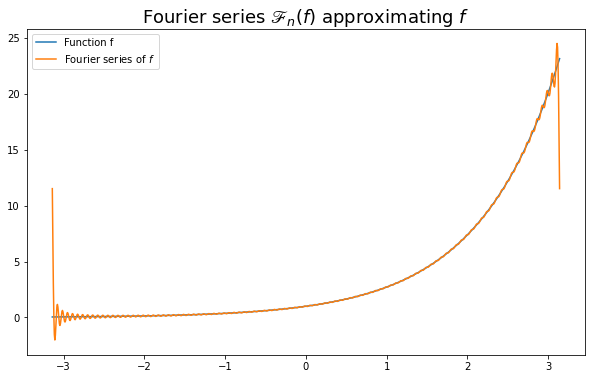

In [39]:
# Test cell.
def f(x):
    return np.exp(x)

n = 100   # order of Fourier series
X = np.linspace(-pi, pi, 1000)   # evaluation points

plt.figure(figsize=(10, 6))
plt.plot(X, f(X), label = "Function f")
plt.plot(X, Fourier(n, f, X), label = "Fourier series of $f$")
plt.title("Fourier series $\mathscr{F}_n(f)$ approximating $f$", fontsize = 18)
plt.legend()

<a id="Fourier-Convergence"></a>
### Convergence and Gibbs phenomenon

Surprisingly, the questions of when the Fourier series converges to the given function, in which manner and at which rate are still ongoing researches, with profound results (Carleson's theorem in 1966 being a notable example, with *exceptionally complicated* proof). Here, we will not discuss the convergence of Fourier series, but nevertheless only consider sufficiently smooth functions that satisfied necessary criteria for convergence.

Let $f$ be a $\mathbb{R}$-valued, $2\pi$-periodic, and differentiale function with bounded derivative on $[-\pi, \pi]$. Plugging in formlae for Fourier coefficients into Fourier series, one obtains
\begin{split}
    \mathscr{F}_n(f)(x) 
    & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(y)\left[1 + 2\sum_{k = 1}^{n}(\cos(kx)\cos(ky) + \sin(kx)\sin(ky)\right]dy \\
    & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(y)\left[1 + 2\sum_{k = 1}^{n}\cos(k(x - y))\right]dy \\
    & = \frac{1}{2\pi} \int_{-\pi-x}^{\pi-x} f(x + t)\left[1 + 2\sum_{k = 1}^{n}\cos(kt)\right]dt \\
\end{split}
using the substitution $t = y - x$. Since $\cos$ is $2\pi$-periodic.

On the other hand, we have the identity
\begin{split}
    \sin\left(\left(n + \frac{1}{2}\right)t\right)
    & = \left[\sin\left(\left(n + \frac{1}{2}\right)t\right) - \sin\left(\left(n - 1 + \frac{1}{2}\right)t\right)\right] + ... \\
    & + \left[\sin\left(\left(1 + \frac{1}{2}\right)t\right) - \sin\left(\frac{t}{2}\right)\right] + \sin\left(\frac{t}{2}\right)\\
    & = \sin\left(\frac{t}{2}\right) \left[1 + 2\sum_{k = 1}^{n}\cos(kt)\right] \\
    \Rightarrow 1 + 2\sum_{k = 1}^{n}\cos(kt)
    & = \frac{\sin\left(\left(n + \frac{1}{2}\right)t\right)}{\sin\left(\frac{t}{2}\right)}.
\end{split}

Finally, the shift in bound of integral does not affect the result, meaning overall, one has 
$$
    \mathscr{F}_n(f)(x) = \int_{-\pi}^{\pi} f(x + t)D_n(t)dt
$$
where $D_n(t) = \frac{1}{2\pi}\left[1 + 2\sum_{k = 1}^{n}\cos(kt)\right] = \frac{\sin\left(n + \frac{1}{2}\right)t}{2\pi\sin\frac{t}{2}}$ is called Dirichlet kernel. The sum $1 + 2\sum_{k = 1}^{n}\cos(kt)$ also shows that one has
$$
    \int_{-\pi}^{\pi} D_n(t) dt = \frac{1}{2\pi}\int_{-\pi}^{\pi} 1 + 2\sum_{k = 1}^{n}\cos(kt) dt = 1
$$
because for all positive integer $k$, one has $\int_{-\pi}^{\pi} \cos(kt) dt = 0$. Hence, one can write
$$
    \mathscr{F}_n(f)(x) - f(x) = \int_{-\pi}^{\pi} D_n(t)(f(x + t) - f(x))dt.
$$
Now, since $f$ is differentiable, the function $\frac{f(x + t) - f(x)}{t}$ is piecewise continuous on $[-\pi, \pi]$, and so is $\frac{f(x + t) - f(x)}{2\pi\sin\left(\frac{t}{2}\right)}$. One can write
\begin{split}
    \mathscr{F}_n(f)(x) - f(x) 
    & = \int_{-\pi}^{\pi} \sin\left[\left(n + \frac{1}{2}\right)t\right] \cdot \frac{f(x + t) - f(x)}{2\pi\sin\left(\frac{t}{2}\right)} dt \\
    & = \int_{-\pi}^{\pi} \frac{f(x + t) - f(x)}{2\pi\sin\left(\frac{t}{2}\right)} \left[\cos\left(\frac{t}{2}\right)\sin(nt) + \sin\left(\frac{t}{2}\right)\cos(nt)\right] dt \\
    & = \int_{-\pi}^{\pi} \frac{(f(x + t) - f(x))\tan\left(\frac{t}{2}\right)}{2\pi}\sin(nt) dt + \int_{-\pi}^{\pi} \frac{f(x + t) - f(x)}{2\pi}\cos(nt) dt\\
\end{split}
where each term is of the form of Fourier coefficient. Riemann-Lebesgue lemma then states that each term converges to 0, hence one has $\mathscr{F}_n(f)(x) - f(x)$ converges to 0.

The case where $f$ has a jump at $x$ is a bit more complicated. From definition, one has
$$
    \int_{-\pi}^{0} D_n(t) dt = \int_{0}^{\pi} D_n(t) dt = \frac{1}{2}
$$
and thus, one can write
\begin{gather*}
    \mathscr{F}_n(f)(x) - \frac{f(x_-) + f(x_+)}{2} \\
    = \int_{-\pi}^{0} \sin\left[\left(n + \frac{1}{2}\right)t\right] \cdot \frac{f(x_- + t) - f(x_-)}{2\pi\sin\left(\frac{t}{2}\right)} dt + \int_{0}^{\pi} \sin\left[\left(n + \frac{1}{2}\right)t\right] \cdot \frac{f(x_+ + t) - f(x_+)}{2\pi\sin\left(\frac{t}{2}\right)} dt,
\end{gather*}
and similar argument shows the convergence to 0. This result is known as Dirichlet's theorem.

<div  markdown=1 class="Thm"> <b>Dirichlet's theorem</b>

Let $f$ be a $\mathbb{R}$-valued, $2\pi$-periodic, and differentiale function with bounded derivative on $[-\pi, \pi]$, then one has
$$
    \lim_{n \to \infty} \mathscr{F}_n(f)(x) = \frac{f(x_-) + f(x_+)}{2},
$$
and at both end points $x = \pm \pi$,
$$
    \lim_{n \to \infty} \mathscr{F}_n(f)(x) = \frac{f(\pi_-) + f(-\pi_+)}{2},
$$

Intuitively, the Fourier series at a point $x$ converges to the best prediction of the possible value of $f(x)$ based the the values at points in neighborhoods. If $f$ has a jump at $x$, $\mathscr{F}(f)(x)$ will converge to the best prediction, i.e. the average of the two limit value from both side.

This rationale can be further illustrated as follow: assuming $f$ has a jump discontinuity at $x$, and one approaches $x$, say, from above. Imagining that one tries to predicts what the most plausible value of $f$ would be based on the information one gathers from the values at neighborhood. At one gets closer to $x$, the available information is less and less, thus the prediction is more and more uncertain.

Numerically, this can be shown by large oscillations near the jump, which is caused fundamentally by the construction of Fourier-type series (including Fourier-Legendre, Fourier-Bessel, and alike), and cannot be avoided: as $n$ gets larger and large, the "uncertainty" does not die out, but converges to a limit. This phenomenon is known as **Gibbs phenomenon**.

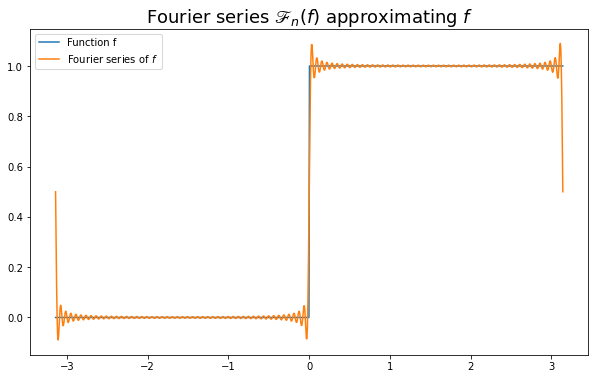

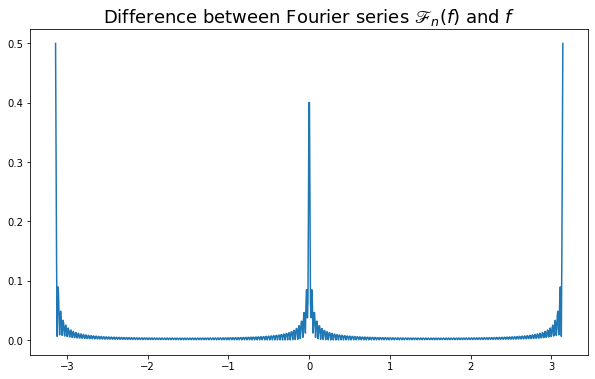

In [34]:
# Test cell.
def f_Heaviside(x):
    return (x > 0)
    
n = 100   # order of Fourier series
X = np.linspace(-pi, pi, 1000)   # evaluation points

plt.figure(figsize=(10, 6))
plt.plot(X, f_Heaviside(X), label = "Function f")
plt.plot(X, Fourier(n, f_Heaviside, X), label = "Fourier series of $f$")
plt.title("Fourier series $\mathscr{F}_n(f)$ approximating $f$", fontsize = 18)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(X, np.abs(f_Heaviside(X) - Fourier(n, f_Heaviside, X)))
plt.title("Difference between Fourier series $\mathscr{F}_n(f)$ and $f$", fontsize = 18)
plt.show()

In the example of Heaviside step function
$$
    f(x) = 
    \begin{cases}
    0 \text{ if } x < 0 \\
    1 \text{ if } x > 0
    \end{cases},
$$
one sees clearly that around the jump and the boundary, Fourier series oscillates rapidly, always overshoot the value by around %9% percent, and this oscillation does not disappear when $n$ increases.

<a id="Fourier-ErrorEstimate"></a>
### Bound on Fourier coefficients and Error of estimate

Given that the error term $\mathscr{F}(f)(x) - f(x)$ is expressed as Fourier coefficient, in order to obtain a bound on the error term, one needs to study the convergence of Fourier coefficient. To this end, we have the following theorem.

(insert some examples of functions of various degree of smoothness to demonstrate the rate of convergence).

<div markdown=1 class="Thm"> <b>Rate of decay of Fourier coefficients</b>

Let $f \in C^{(p-1)}$ and be $2\pi$-periodic, such that $f^{p-1}$ is differtiable and $f^{(p)}$ is piecewise continuous except at a set of jumps, then one has $|a_n|, |b_n| = O(n^{-p})$.

> **Proof**. Suppose that $f$ is continuous as a periodic function, and $f'$ is piecewise continuous. Then, integration by parts gives
\begin{split}
    a_n 
    & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)\cos(nx) dx \\
    & = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) d\left(\frac{\sin(nx)}{n}\right) \\
    & = \frac{1}{2\pi} \left[\frac{f(x)\sin(nx)}{n} \Big\vert_{-\pi}^{\pi} - \frac{1}{n}\int_{-\pi}^{\pi} f'(x)\sin(nx) dx \right] \\
    & = -\frac{1}{2\pi n}\int_{-\pi}^{\pi} f'(x)\sin(nx) dx, 
\end{split}
where $\frac{f(x)\sin(nx)}{n} \Big\vert_{-\pi}^{\pi} = 0$ as $f$ and $\sin$ are both $2\pi$-periodic. Now, $f'$ is piecewise continuous, and so is $|f'|$, so it is bounded. Let $M = \sup_{x \in [-\pi, \pi]} |f'(x)|$, one has
\begin{split}
    |a_n|
    & = \left|-\frac{1}{2\pi n}\int_{-\pi}^{\pi} f'(x)\sin(nx) dx \right| \\
    & \leq \frac{1}{2\pi n}\int_{-\pi}^{\pi} M dx = \frac{M}{n} \\
\end{split}
Similarly, $|b_n| \leq \frac{M}{n}$. Notice that $-\frac{1}{2\pi n}\int_{-\pi}^{\pi} f'(x)\sin(nx) dx$ has the form of a Fourier coefficient corresponding to $f'$, so if $f$ is higher-differentiable, the process can be continued, each time adding a factor $n$ into the denominator. Hence, one has $|a_n|, |b_n| = O(n^{-p})$.

<div markdown=1 class="Rmk"> From here, one can deduce the bound on the error given by truncated Fourier series $\mathscr{F}_n(f)$ at point $x$, by applying the previous result on function 
$$
    t \mapsto \frac{(f(x + t) - f(x))\tan\left(\frac{t}{2}\right)}{2\pi}\sin(nt)
$$
and
$$
    t \mapsto \frac{f(x + t) - f(x)}{2\pi}\cos(nt).
$$

<a id="Fourier-Legendre"></a>
## Fourier-Legendre series

To emphasize the importance of approach based on linear algebra, we recall the concept of Legendre polynomials in Lecture 3.

<div  markdown=1 class="Prop"> <b>Legendre orthogonal polynomials.</b>

There exists a unique family of polynomials $\left(Q_n\right)_{n\geq 0}$ verifying

- $Q_n$ is of degree $n$,
- $\displaystyle \int_{-1}^1 P(x) Q_n(x) dx = 0$ for any polynomial $P$ of degree at most $n-1$,
- $Q_n(1)=1$.

These polynomials are called the Legendre polynomials. 

one also has a similar proposition to Fourier coefficients

<div  markdown=1 class="Prop"> One has
$$
\int_{-1}^1 Q_m(x) Q_n(x) dx = 
\begin{cases}
0 \text{ if } m \neq n \\
\frac{2}{2n+1} \text{ if } m = n
\end{cases}
$$.

If we consider the set $\mathcal{G}$ be the set of functions that are $\mathbb{R}$-valued and integrable, one can check that $\mathcal{G}$ is a linear space. Now, define an inner product as follow: for any $f, g \in \mathcal{G}$, let
$$
    \langle f, g \rangle = \int_{-1}^{1} f(x)g(x) dx.
$$
and the norm
$$
    \|f\| = \sqrt{\langle f, f \rangle} = \left(\int_{-1}^{1} f(x)^2 dx\right)^{\frac{1}{2}}.
$$
The Proposition aboves roughly states that the set $\{Q_k\}_{k = 1}^{\infty}$ forms an infinite orthogonal system over $\mathcal{G}$, hence one may consider the series 
$$
    \mathscr{G}_n(f)(x) = \sum_{k = 0}^{\infty} a_n Q_n(x)
$$
and the result from linear algebra helps us determining that
$$
    a_n = \frac{\langle f, Q_n \rangle}{\|Q_n\|^2} = \frac{2n+1}{2}\int_{-1}^{1} f(x)Q_n(x)dx.
$$
This series is commonly known as **Fourier-Legendre series**. To demonstrate this, we reexamine the functions having been studied above.

In [41]:
# Calculate Fourier series

def coeffLegendre(n, f):
    """
    Calculate the Legendre coefficient of cos(nx)
    -----------------------------------------------------
    Input:
    n: order of the term
    f: function to construct Fourier-Lagrange series
    
    Output:
    The Fourier coefficient of cos(nx)
    """
    return quad_vec(lambda x : f(x)*eval_legendre(n, x), -1, 1)[0] * (n + 1/2)

def Legendre(order, f, x):
    """
    Calculate Fourier series
    -----------------------------------------------------
    Input:
    order: order of series
    f: function to construct Fourier-Lagrange series
    x: point of evaluation
    
    Output:
    The value of Fourier series of f at x
    """
    ans = np.zeros(len(x))
    for n in np.arange(0, order):
        ans += coeffLegendre(n, f) * eval_legendre(n, X)
    return ans

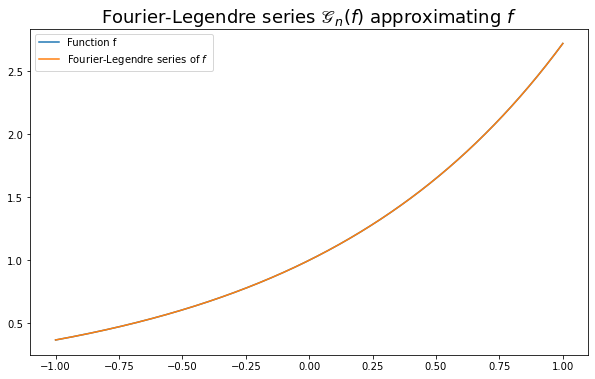

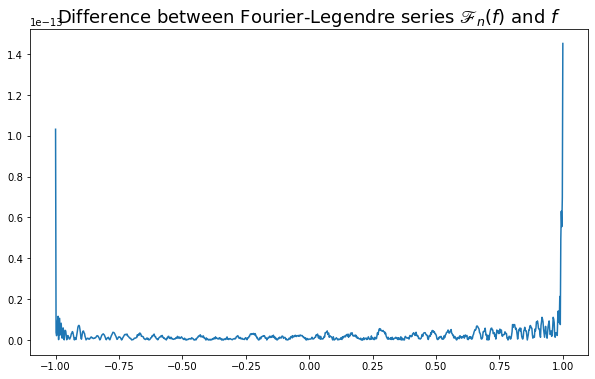

In [43]:
n = 100   # order of Fourier-Legendre series
X = np.linspace(-1, 1, 1000)   # evaluation points

plt.figure(figsize=(10, 6))
plt.plot(X, f(X), label = "Function f")
plt.plot(X, Legendre(n, f, X), label = "Fourier-Legendre series of $f$")
plt.title("Fourier-Legendre series $\mathscr{G}_n(f)$ approximating $f$", fontsize = 18)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(X, np.abs(f(X) - Legendre(n, f, X)))
plt.title("Difference between Fourier-Legendre series $\mathscr{F}_n(f)$ and $f$", fontsize = 18)
plt.show()

Surprisingly, while the proof of convergence for Fourier series is long and technical (as demonstrated by Dirichlet's theorem), the proof for Fourier-Legendre series is less complex yet more intuitive, due to its nature being polynomial. In particular, we have the following theorem regarding the case of continuous function. The case of piecewise continuous function possesses more technicalities, which is beyond the scope of this study.

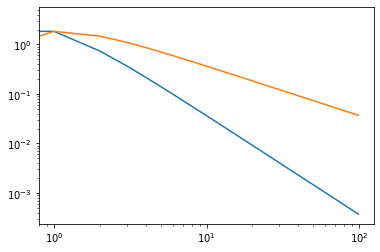

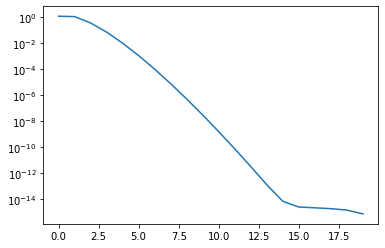

In [44]:
n = np.arange(100)
plt.plot(n, np.abs(coeffFourier_Cos(n, f)), label="Coefficients $a_n$ in Fourier series")
plt.plot(n, np.abs(coeffFourier_Sin(n, f)), label="Coefficients $b_n$ in Fourier series")
#plt.plot(n, n, label="$b_n$")
plt.xscale('log')
plt.yscale('log')
plt.show()

n = np.arange(20)
plt.plot(n, np.abs(coeffLegendre(n, f)), label="Coefficients in Fourier-Legendre series")
plt.yscale('log')
plt.show()

<div  markdown=1 class="Thm"> <b>Completeness of Legendre polynomials</b>

Let $\mathcal{G}'$ be the set of continuous functions on a closed interval. The set of Legendre polynomial forms a complete orthnormal system over $\mathcal{G}'$. In other words, for any function $f \in \mathcal{G}'$, one has
$$
    \lim_{n \to \infty} \mathscr{G}'_n(f) (x) = f(x), \forall x \in [-1, 1].
$$

> **Proof.**
One starts from Weierstrass approximation theorem, stating that any function $g \in \mathcal{G}'$ can be arbitrarily well-approximated by polynomials, meaning the set of monic monomials $\{1, x, x^2, ... \}$ spans over $\mathcal{G}'$. Now, one also has the set of monic monomials to be linearly independent, as a polynomial vanishes identically if and only if all coefficients are 0.
> 
> Hence, Gram-Schmidt process produces a set of polynomials $\{p_k\}_{k = 1}^{\infty}$ such that it is an orthonormal system spanning over $\mathcal{G}'$. Such process also guarantees that $\deg p_k = k$, and that $span(p_0, p_1, ..., p_k) = span(1, x, ..., x^k)$. Thus, any polynomial $q$ of degree less than $k$ can be written as a linear combination of $p_0, p_1, ..., p_{k-1}$, and the fact that $\{p_k\}_{k = 1}^{\infty}$ is orthonormal then implies that
$$
    \int_{-1}^{1} p_k(x) q(x) dx = 0.
$$
Finally, one can show further that $p_k(1) = 1$, implying $p_k$ is actually $k$-th Legendre polynomial, as desired.

Similar to Fourier series, in case of discontinuous jump, one can show that the Fourier-Legendre series evalutating at the jump converges to the average of limits from both sides. Yet, unlike Fourier series, at end points $x = \pm 1$, Fourier-Legendre series does not converges to $\frac{f(1_-) + f(-1_+)}{2}$, because Legendre polynomials, unlike $\sin$ and $\cos$, are not periodic. Hence, they have one more degree of freedom, and are able to converge to the one-side limit.

Considering the examples of continuous functions, one may be tempted to say that Fourier-Legendre series approximates $f$ better than Fourier series. And indeed, this is the case for continuous functions, but for the case of *piecewise* continuous function, Fourier-Legendre series behave worse than Fourier series.

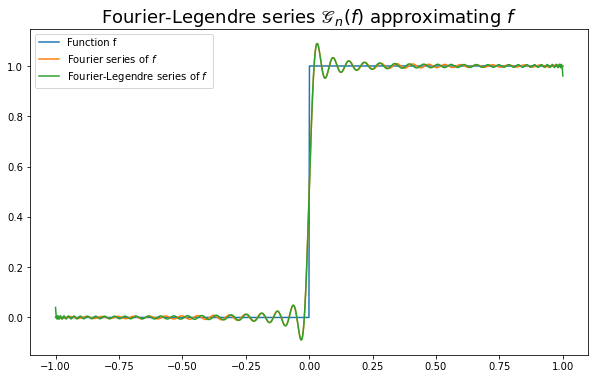

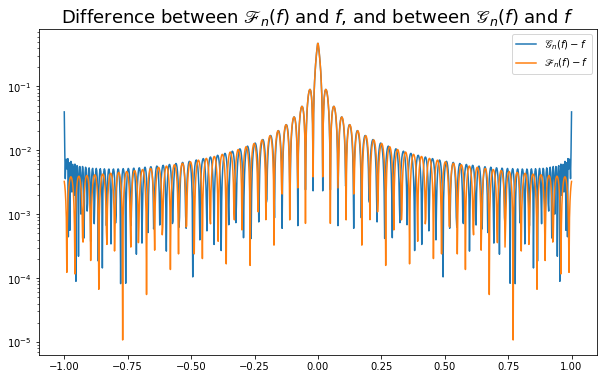

In [52]:
# Test cell.
def f_Heaviside(x):
    return (x > 0)

n = 100   # order of Fourier-Legendre series
X = np.linspace(-1, 1, 1000)   # evaluation points

plt.figure(figsize=(10, 6))
plt.plot(X, f_Heaviside(X), label = "Function f")
plt.plot(X, Fourier(n, f_Heaviside, X), label = "Fourier series of $f$")
plt.plot(X, Legendre(n, f_Heaviside, X), label = "Fourier-Legendre series of $f$")
plt.title("Fourier-Legendre series $\mathscr{G}_n(f)$ approximating $f$", fontsize = 18)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(X, np.abs(f_Heaviside(X) - Legendre(n, f_Heaviside, X)), label="$\mathscr{G}_n(f) - f$")
plt.plot(X, np.abs(f_Heaviside(X) - Fourier(n, f_Heaviside, X)), label="$\mathscr{F}_n(f) - f$")
plt.title("Difference between $\mathscr{F}_n(f)$ and $f$, and between $\mathscr{G}_n(f)$ and $f$", \
          fontsize = 18)
plt.legend()
plt.yscale('log')
plt.show()

We make a final remake before concluding this subsection, that without the theory of linear algebra on infinite-dimensional linear space, the idea of such series like Fourier-Legendre is not trivial. Legendre polynomials arise originally from a differential equation, which makes the fact that its properties coincide with the properties of $p_k$ should make one question if there exists any connection between the two. Indeed there exists such connection, but being profound and deep, so much so that it lies beyond the scope of this study.

<a id="Trig"></a>
## Trigonometric interpolation

Up to this point, we have the necessary theoretical tools to calculate Fourier coefficients. But, while working great in theoretical aspect, the formulae possess problems in practice, as calculating integration is costly and risks imprecision. In this Section, we will investigate another approach.

Let $f$ be a $\mathbb{R}$-valued, integrable and $2\pi$-periodic function. We first remark that if $f$ is even, then $x \mapsto f(x)\sin(nx) (n \in \mathbb{N})$ will be odd, so that $b_n = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)\sin(nx) dx = 0$. In this case, the Fourier series will be
$$
    \mathscr{F}(f)(x) = a_0 + 2\sum_{k = 1}^{n} a_k \cos(kx).
$$
Likewise, if $f$ is odd, then $x \mapsto f(x)\cos(nx) (n \in \mathbb{N})$ is odd, implying $a_n = 0$ and the Fourier series will be
$$
    \mathscr{F}(f)(x) = 2\sum_{k = 1}^{n} b_k \sin(kx).
$$
If $f$ is neither odd nor even, one can decompose $f$ as
$$
    f(x) = \frac{f(x) + f(-x)}{2} + \frac{f(x) - f(-x)}{2},
$$
and easily verify that in fact the function $x \mapsto \frac{f(x) + f(-x)}{2}$ is even and $x \mapsto \frac{f(x) - f(-x)}{2}$ is odd.

Finally, there will be little difference between the analysis of the series $a_0 + 2\sum_{k = 1}^{n} a_k \cos(kx)$ and $2\sum_{k = 1}^{n} b_k \sin(kx)$, so we will focus on the former, with the resul for the latter following analogously. Hence, let us assume that $f$ is even, and thus its truncated Fourier series is given by
$$
    \mathscr{F}_n(f) (x) = a_0 + 2\sum_{k = 1}^{n} a_k \cos(kx).
$$

<a id="Trig-General"></a>
### General trigonometric polynomial

Now, we consider the series that resembles truncated Fourier series, defined as
$$
    \mathscr{P}_n(f) (x) = p_0 + 2\sum_{k = 1}^{n} p_k \cos(kx).
$$
Regarding this as a polynomial of degree $n$ or less in terms of $\cos(x)$, instead of using classical formulae, one may think of interpolating in order to get the coefficients. Classical result from polynomial interpolation states that one needs $n + 1$ point to make $\mathscr{F}_n(f)$ existing and uniquely determined.

Thus, let us consider $n+1$ points $\{x_k\}_{k = 0}^{n}$ (which, since $f$ is even, we may assume without loss of generality that $x_k \in [0, \pi]$ for all $k \in \{0, ..., n\}$), and finding $a_0, a_1, ... a_n$ so that
$$
    \mathscr{P}_n(f)(x_k) = f(x_k).
$$
Writing in matrix form, one has
$$
    \left[
    \begin{matrix}
    f(x_0) \\
    f(x_1) \\
    \vdots \\
    f(x_n)
    \end{matrix}
    \right]
    =
    \left[
    \begin{matrix}
    p_0 + 2\sum_{k = 1}^{n} p_k \cos(k x_0) \\
    p_0 + 2\sum_{k = 1}^{n} p_k \cos(k x_1) \\
    \vdots \\
    p_0 + 2\sum_{k = 1}^{n} p_k \cos(k x_n)
    \end{matrix}
    \right]
    =
    \left[
    \begin{matrix}
    1 & 2\cos(x_0) & \cdots & 2\cos(n x_0)\\
    1 & 2\cos(x_1) & \cdots & 2\cos(n x_1)\\
    \vdots & \vdots & \ddots &  \vdots\\
    1 & 2\cos(x_n) & \cdots & 2\cos(n x_n)\\
    \end{matrix}
    \right]
    \cdot
    \left[
    \begin{matrix}
    p_0 \\
    p_1 \\
    \vdots \\
    p_n
    \end{matrix}
    \right]
$$
which, letting
$$
    X = \left[
    \begin{matrix}
    x_0 \\
    x_1 \\
    \vdots \\
    x_n
    \end{matrix}
    \right],
    f(X) = \left[
    \begin{matrix}
    f(x_0) \\
    f(x_1) \\
    \vdots \\
    f(x_n)
    \end{matrix}
    \right],
    A = 
    \left[
    \begin{matrix}
    1 & 2\cos(x_0) & \cdots & 2\cos(n x_0)\\
    1 & 2\cos(x_1) & \cdots & 2\cos(n x_1)\\
    \vdots & \vdots & \ddots &  \vdots\\
    1 & 2\cos(x_n) & \cdots & 2\cos(n x_n)\\
    \end{matrix}
    \right], 
    p = \left[
    \begin{matrix}
    p_0 \\
    p_1 \\
    \vdots \\
    p_n
    \end{matrix}
    \right]
$$
simplies the expression into 
$$
    A p = f(X).
$$
The existence and uniqueness of $\mathscr{F}_n(f)$ means that $X_a$ must be invertible, so one can then solve for $a$.

In [56]:
def X_a(X):
    """
    Computing the "Vandermonde" matrix for cosine basis
    -----------------------------------------------------
    Input:
    X: the list of interpolation points
    
    Output:
    The "Vandermonde" matrix for trigonometric polynomial
    """
    n = np.arange(X.size)
    Xa = np.array([2*np.cos(n*x) for x in X])
    Xa[:, 0] = 1
    return Xa

def a(X, f):
    """
    Computing the coefficients for trigonometric polynomial, using "Vandermonde" matrix for cosine basis
    -----------------------------------------------------
    Input:
    X: interpolation points
    f: function of consideration
    
    Output:
    The coefficents for trigonometric polynomial
    """
    Xa = X_a(X)
    return np.linalg.solve(Xa, f(X))

def evalA(X, coeffCos):
    """
    Evaluating cosine polynomial
    -----------------------------------------------------
    Input:
    X: evaluation points
    coeffCos: coefficients of cosine polynomial
    """
    ans = np.zeros(X.shape)
    for n in range(1, len(coeffCos)):
        ans += coeffCos[n]*np.cos(n*X)
    return 2*ans + coeffCos[0]

In [10]:
def compare_Pnf_f(f, interpX, X):
    """
    Plots f and P_n(f) one one side, and the local error e_n(f) = |f-P_n(f)| on the other side
    -----------------------
    Inputs: 
    f : continuous function on [0,pi]
    interpX : 1D array containing the interpolation nodes in [0,pi]
    X : 1D array containing the points at which f and P_n(f) will be plotted
    
    Output: 2 figures
    left : f and P_n(f)
    right : the local error e_n(f)
    """
    plt.figure(figsize=(20, 8))

    plt.subplot(121)
    plt.plot(X, f(X), label = 'Target function $f$')
    plt.plot(interpX, f(interpX), marker='o', linestyle='', label = 'data set')
    plt.plot(X, evalA(X, a(interpX, f)), '--',label = 'Interpolation polynomial $\mathscr{P}_n(f)$')
    plt.legend(fontsize = 18)
    plt.xlabel('x', fontsize = 18)
    plt.tick_params(labelsize=18)
    plt.title('f and its interpolation polynomial, n = %i' %n, fontsize = 18)

    plt.subplot(122)
    plt.plot(X, abs(f(X) - evalA(X, a(interpX, f))), \
             label = '$e_n(f) = |f-\mathscr{P}_n(f)|$')
    plt.plot(interpX, 1e-16*np.ones(interpX.size), marker='o', linestyle='', label = 'Interpolation nodes')
    plt.legend(fontsize = 18)
    plt.xlabel('x', fontsize = 18)
    plt.tick_params(labelsize=18)
    plt.yscale('log')
    plt.title('Local interpolation error e_n(f) in log-scale, n = %i' %n, fontsize = 18)

    plt.show()

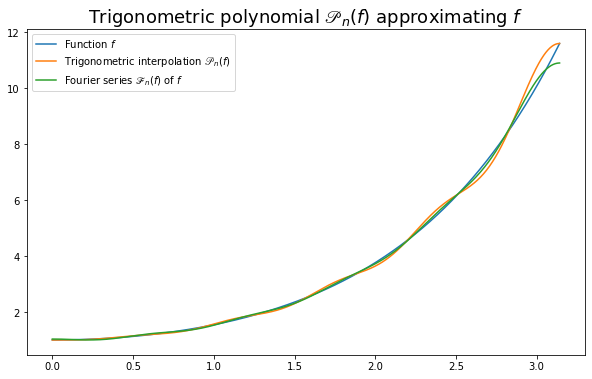

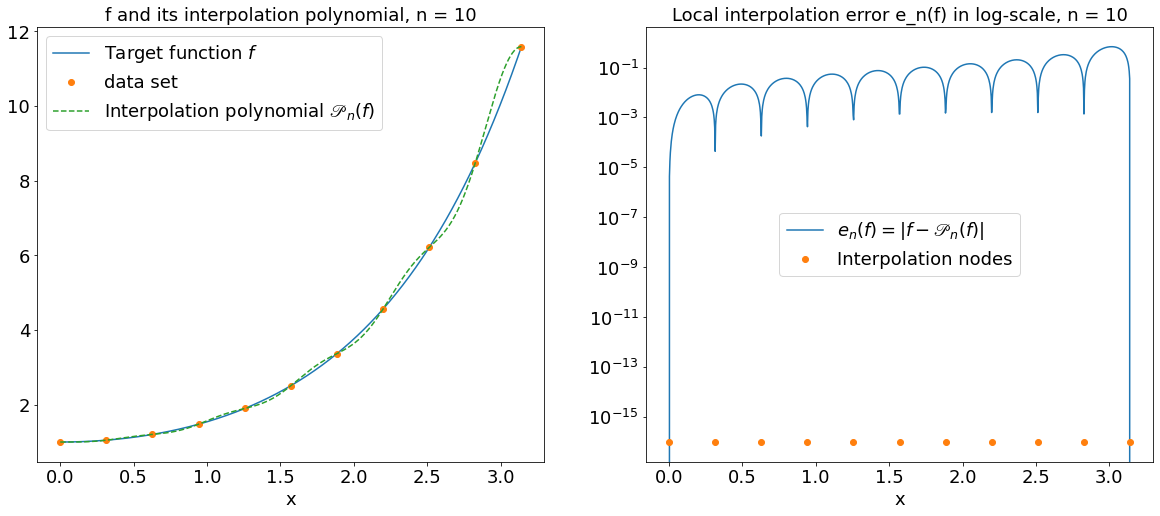

In [47]:
# Test function
def f(x):
    return np.exp(x)

def evenF(f, x):
    return (f(x) + f(-x))/2

n = 10 # degree of trigonometric polynomial

interpX = np.transpose([np.linspace(0, pi, n+1)]) # n+1 equidistant points for interpolation
#interpX = np.transpose([np.linspace(pi/(2*(n+1)), pi*(2*n+1)/(2*(n+1)), n+1)]) # n+1 DCT nodes
#interpX = np.transpose([np.random.rand(n+1)*pi]) # n+1 random points for interpolation
X = np.transpose([np.linspace(0, pi, 1000)]) # evaluation points

plt.figure(figsize=(10, 6))
plt.plot(X, evenF(f, X), label="Function $f$")
plt.plot(X, evalA(X, a(interpX, lambda x: evenF(f, x))), \
         label="Trigonometric interpolation $\mathscr{P}_n(f)$")
plt.plot(X, Fourier(n, lambda x: evenF(f, x), X), label = "Fourier series $\mathscr{F}_n(f)$ of $f$")
plt.title("Trigonometric polynomial $\mathscr{P}_n(f)$ approximating $f$", fontsize = 18)
plt.legend()
plt.show()

compare_Pnf_f(lambda x : evenF(f, x), interpX, X)

Now, we have 2 different approaches to calculate Fourier coefficients, let us compare where the results match.

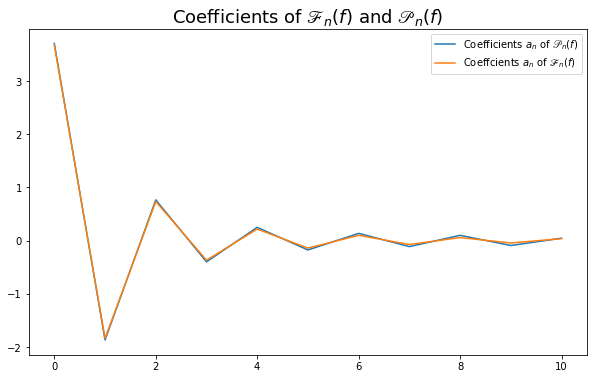

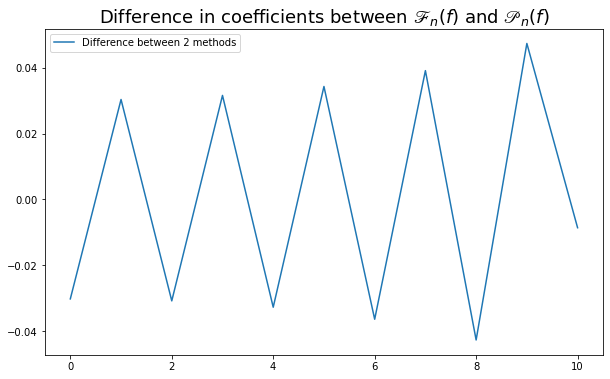

In [49]:
n = 10
N = np.arange(n+1)

interpX = np.transpose([np.linspace(0, pi, n+1)]) # n+1 equidistant points for interpolation
#interpX = np.transpose([np.random.rand(n+1)*pi]) # n+1 random points for interpolation
X = np.transpose([np.linspace(0, pi, 1000)]) # evaluation points

coeffFourier = coeffFourier_Cos(N, lambda x: evenF(f, x))
coeffTrig = np.reshape(a(interpX, lambda x: evenF(f, x)), coeffFourier.shape)

plt.figure(figsize=(10, 6))
plt.plot(N, coeffTrig, label="Coefficients $a_n$ of $\mathscr{P}_n(f)$")
plt.plot(N, coeffFourier, label="Coeffcients $a_n$ of $\mathscr{F}_n(f)$")
plt.title("Coefficients of $\mathscr{F}_n(f)$ and $\mathscr{P}_n(f)$", fontsize = 18)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N, coeffFourier - coeffTrig, label="Difference between 2 methods")
plt.title("Difference in coefficients between $\mathscr{F}_n(f)$ and $\mathscr{P}_n(f)$", fontsize = 18)
plt.legend()
plt.show()

We observe that in general the results do not match up, and we expect such difference, because Fourier series is constructed to minimize the norm of $\mathscr{F}_n(f) - f$, while $\mathscr{P}_n(f)$ is constructed to match $f$ at $x_0, x_1, ..., x_n$, and these 2 constructions do not necessary match, as was illustrated. Yet, when $n$ tends to $\infty$, we still have that for *some* interpolation nodes $\{x_k\}_{k = 0}^{n}$, one has $\mathscr{P}_n(f)$ converges to $f$ as long as $f$ is continuous, as guaranteed by Weirestrass's approxmation theorem apply on function $f \circ \arccos$.

<a id="Trig-Chebyshev"></a>
### Runge phenomenon and Chebyshev polynomials

Yet, regarding $\mathscr{P}_n(f)$ as a polynomial of $\cos$ means it inherits properties of polynomial interpolation, including well-known Runge phenomenon. Indeed, recall the Runge phenomenon demonstrates the failure of approximating function $f(x) = \frac{1}{1 + 25 x^2}$ on $[-1, 1]$ when using equidistant nodes, we may ask whether $\mathscr{P}_n(f)$ will also fail, for instance, by using the function
$$
    f_{Runge}(x) = \frac{1}{1 + 25 \cos^2(x)}
$$
and the interpolation nodes $\bar{x}_k = \frac{k\pi}{n}$ for $k = 0, ..., n$.

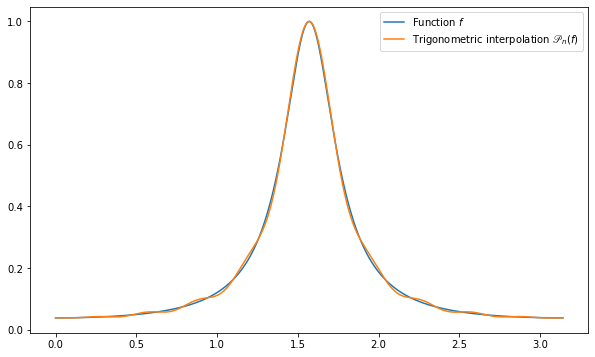

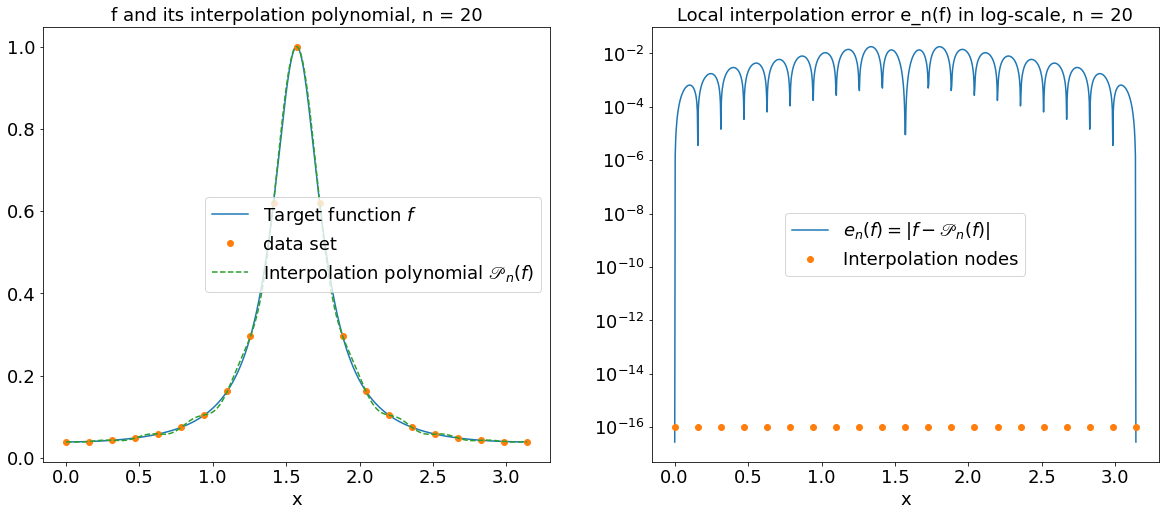

In [53]:
# Test function
def f_Runge(x):
    return 1/(1 + 25*np.cos(x)**2)

n = 20 # degree of trigonometric polynomial
interpX = np.transpose([np.linspace(0, pi, n+1)]) # n+1 equidistant points for interpolation
#interpX = np.transpose([np.random.rand(n+1)*pi]) # n+1 random points for interpolation
X = np.transpose([np.linspace(0, pi, 1000)]) # evaluation points

plt.figure(figsize=(10, 6))

plt.plot(X, evenF(f_Runge, X), label="Function $f$")
plt.plot(X, evalA(X, a(interpX, lambda x: evenF(f_Runge, x))), \
         label="Trigonometric interpolation $\mathscr{P}_n(f)$")
plt.legend()
plt.show()

compare_Pnf_f(f_Runge, interpX, X)

Those who expect the same phenomenon may be surprised at first, but $\mathscr{P}_n(f)$ does not suffer from the same problem, and this is expected once we look into how $\mathscr{P}_n(f \circ \arccos)$ behaves. Specifically, one has $\{\hat{x}_k\}_{k = 0}^{n} = \left\{\frac{k\pi}{n}\right\}_{k = 0}^{n}$ is extrema of Chebyshev polynomial of degree $n$ and $\mathscr{P}_n(f)$ is the interpolation scheme based on Chebyshev polynomials, which is proven to be able to avoid Runge phenomenon.

In this case, $\mathscr{P}_n(f)$ appears to converge to $f$, and indeed, if one acquires $f$ to be *a little bit* more than continuous (for instance, Lipschitz), then one can show that $\mathscr{P}_n(f)$ converges uniformly to $f$. As $\mathscr{F}_n(f)$ also converges uniformly to $f$ in this case, one may expect the difference in coefficients of $\mathscr{P}_n(f)$ and $\mathscr{F}_n(f)$ to converge to 0 as $n$ tends to infinity.

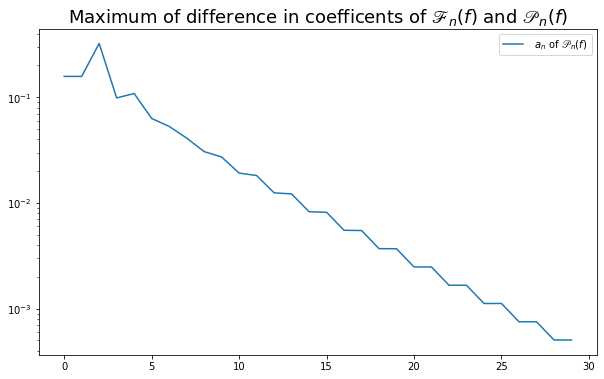

In [55]:
n = 30

diff = np.zeros(n)
for k in range(n):
    interpX = np.transpose([np.linspace(0, pi, k+1)]) # n+1 equidistant points for interpolation
    #interpX = np.transpose([np.linspace(pi/(2*(k+1)), pi*(2*k+1)/(2*(k+1)), k+1)]) # k+1 DCT nodes
    #interpX = np.transpose([np.random.rand(k+1)*pi]) # n+1 random points for interpolation
    X = np.transpose([np.linspace(0, pi, 1000)]) # evaluation points
    
    N = np.arange(k+1)

    coeffFourier = coeffFourier_Cos(N, lambda x: evenF(f_Runge, x))
    coeffTrig = np.reshape(a(interpX, lambda x: evenF(f_Runge, x)), coeffFourier.shape)
    
    diff[k] = np.max(np.abs(coeffFourier - coeffTrig))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(n), diff, label=" $a_n$ of $\mathscr{P}_n(f)$")
plt.title("Maximum of difference in coefficents of $\mathscr{F}_n(f)$ and $\mathscr{P}_n(f)$", fontsize = 18)
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

<a id="Trig-DCT"></a>
### Discrete Cosine Transform

<img src="figures/Nasir_Ahmed.png" alt="Ahmed" style="width: 300px;" />

> **Nasir Ahmed** (born 1940 in Bangalore, India) is an Indian-American electrical engineer and computer scientist. He is Professor Emeritus of Electrical and Computer Engineering at University of New Mexico (UNM). He is best known for inventing the discrete cosine transform (DCT) in the early 1970s. The DCT is the most widely used data compression transformation, the basis for most digital media standards (image, video and audio) and commonly used in digital signal processing. He also described the discrete sine transform (DST), which is related to the DCT. (source: wikipedia.org)

Before going further, let us quickly reminds the definition and crucial results on Chebyshev polynomials.

<div  markdown=1 class="Def"> The Chebyshev polynomial of order $n$ is noted $T_n$ and is defined by induction: $T_0(X) = 1$, $T_1(X) = X$ and, for all $n\geq 1$

$$T_{n+1}(X) = 2XT_n(X) - T_{n-1}(X).$$

<div  markdown=1 class="Prop"> For all $n \in \mathbb{N}$, the polynomial $T_n$ has the following properties

- It is a polynomial of degree $n$ and, if $n\geq 1$, the leading coefficient is $2^{n-1}$.

- For all $\theta \in \mathbb{R}$,

$$ T_n(\cos\theta) = \cos(n\theta). $$

- $T_n$ has its $n$ (distinct) roots in $(-1,1)$ given by

$$\hat{x}_k = \cos\left(\frac{2k + 1}{2n}\pi\right), \qquad{} 0 \leq k \leq n-1.$$

- $T_n(x) = 2^{n-1}(x-\hat{x}_0)\cdots(x-\hat{x}_{n-1})$

- For $x\in [-1,1]$, one has $-1 \leq T_n(x) \leq 1$. If we let $\hat{y}_k = \cos\left(\frac{k\pi}{n}\right)$ for $0\leq k \leq n$, we have

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 \quad{} \text{with} \quad{} T_n\left(\hat{y}_k\right) = (-1)^{k}$$

We first recall the theorem regarding error in polynomial interpolation from Lecture 2.

<div  markdown=1 class="Thm">  <b> Estimation of the error </b> 

Let $f : [a,b] \to \mathbb{R}$ be $n+1$ times differentiable and consider $n+1$ distinct interpolations nodes $x_0,\ldots,x_n$ in $[a,b]$.  Then, for every $x$ in $[a,b]$, there exists $\xi_x \in (a,b)$ such that 

$$
f(x) - P_n(f)(x) = \frac{\Pi_{x_0,\ldots,x_n}(x)}{(n+1)!} f^{(n+1)}(\xi_x).
$$

In particular, we get that

$$
E_n(f) = \sup_{x\in[a,b]} \vert f(x) - P_n(f)(x) \vert \leq \frac{\sup_{x\in [a,b]} \left\vert \Pi_{x_0,\ldots,x_n}(x) \right\vert }{(n+1)!} \sup_{x\in [a,b]} \left\vert f^{(n+1)}(x) \right\vert.
$$

The connection with Chebyshev polynomials helps us determining the optimal choice of interpolation nodes. In particular, one also has the following crucial result to provide a rationale for the use of Chebyshev nodes, again, from Lecture 2.

<div markdown=1 class="Thm"> <b> Optimality of Chebyshev nodes </b>

Let $n \in \mathbb{N}$, for a set of $n+1$ interpolation points $x_0, x_1, ..., x_n$, define
$$
    \left\Vert \Pi_{x_0\ldots\,x_n} \right\Vert_\infty = \sup_{x\in [a,b]}\lvert \Pi_{x_0\ldots\,x_n}(x) \rvert =  \sup_{x\in [a,b]}\lvert (x-x_0)(x-x_1)\ldots(x-x_n) \rvert.
$$
One has
$$
    \left\Vert \Pi_{\hat{x}_0\ldots\,\hat{x}_n} \right\Vert_\infty \leq \left\Vert \Pi_{x_0\ldots\,x_n} \right\Vert_\infty
$$
for *all* sets of $n+1$ interpolation points $x_0, x_1, ..., x_n$ in $[-1, 1]$.

In this Subsection, we focus on $\hat{x}_0, \hat{x}_1, ..., \hat{x}_n$ as roots of Chebyshev polynomial of degree $(n+1)$ as *the optimal set of $n+1$ interpolation nodes* for $\mathscr{P}_n(f)$. The corresponding "Vandermonde" matrix $\hat{A}$ is given by
$$
    \hat{A}_n = 
    \left[
    \begin{matrix}
    1 & 2\cos(\hat{x}_0) & \cdots & 2\cos(n \hat{x}_0)\\
    1 & 2\cos(\hat{x}_1) & \cdots & 2\cos(n \hat{x}_1)\\
    \vdots & \vdots & \ddots &  \vdots\\
    1 & 2\cos(\hat{x}_n) & \cdots & 2\cos(n \hat{x}_n)\\
    \end{matrix}
    \right], 
$$

As it turns out, when one uses the Chebyshev nodes, the inverse of matrix A has a specific form which we will admit, being given below
$$
    \hat{A}_n^{-1} = \frac{1}{N} \cdot
    \left[
    \begin{matrix}
    1 & \cos(\hat{x}_0) & \cdots & \cos(n \hat{x}_0)\\
    1 & \cos(\hat{x}_1) & \cdots & \cos(n \hat{x}_1)\\
    \vdots & \vdots & \ddots &  \vdots\\
    1 & \cos(\hat{x}_n) & \cdots & \cos(n \hat{x}_n)\\
    \end{matrix}
    \right].
$$

More importantly, this matrix gives an explicit form for the coefficients of $\mathscr{P}_n(f)$, which we can use to prove the bound on difference between the coefficients of $\mathscr{P}_n(f)$ and of $\mathscr{F}_n(f)$. First, we have the following elementary result.

<div markdown=1 class="Prop">

Let $f : [a, b] \mapsto \mathbb{R}$ be a Riemann integrable function. Consider the left Riemann sum using $n$ equidistant nodes given by
$$
    x_k = a + k\cdot\frac{b-a}{n}
$$
for $k = 0, ..., n-1$. Denote 
$$
    I = \int_{a}^{b} f(x) dx
$$
and
$$
    I_n = \frac{b-a}{n} \sum_{k = 0}^{n-1} f(x_k). 
$$
One has
- if $f$ is monotone, 
$$
    |I - I_n| \leq \frac{b - a}{n} |f(b) - f(a)|,
$$
- if $f$ is  differentiable
$$
    |I - I_n| \leq \frac{(b - a)^2}{n} \sup_{x \in [a, b]} |f'(x)|.
$$

> **Proof**. 
> - One has
\begin{split}
    |I - I_n|
    & = \left|\int_{a}^{b} f(x) dx - \frac{b-a}{n} \sum_{k = 0}^{n-1} f(x_k)\right| \\
    & = \sum_{k = 0}^{n-1} \left|\int_{x_k}^{x_k+1} f(x) dx - \frac{b-a}{n} f(x_k)\right|
\end{split}
now by monotonicity of $f$, 
\begin{split}
    |I - I_n|
    & = \sum_{k = 0}^{n-1} \left|\int_{x_k}^{x_k+1} f(x) dx - \frac{b-a}{n} f(x_k)\right|
    & \leq \sum_{k = 0}^{n-1} \left|\frac{b-a}{n} (f(x_{k+1}) - f(x_k))\right| \\
    & = \frac{b - a}{n} |f(b) - f(a)|.
\end{split}
> - By mean value theorem, for any $y_1, y_2 \in [a, b]$, there exists $y_0 \in [y_1, y_2]$ such that 
$$
    \frac{f(y_2) - f(y_1)}{y_2 - y_1} = f'(y_0), 
$$
hence, 
\begin{split}
    |I - I_n|
    & = \sum_{k = 0}^{n-1} \left|\int_{x_k}^{x_k+1} f(x) dx - \frac{b-a}{n} f(x_k)\right| \\
    & \leq \sum_{k = 0}^{n-1} \left|\frac{b-a}{n} \sup_{x \in [x_k, x_{k+1}]} f(x) - \frac{b-a}{n} f(x_k)\right| \\
    & \leq \frac{b-a}{n}\sum_{k = 0}^{n-1} \frac{\left(\sup_{x \in [x_k, x_{k+1}]} f(x)\right) - f(x_k)}{\left(\arg \sup_{x \in [x_k, x_{k+1}]} f(x) \right) - x_k} \cdot\left(\left(\arg \sup_{x \in [x_k, x_{k+1}]} f(x) \right) - x_k\right) \\
    & \leq \frac{b-a}{n}\sum_{k = 0}^{n-1} \sup_{x \in [x_k, x_{k+1}]} f'(x) \frac{b - a}{n} \\
    & \leq \frac{(b - a)^2}{n} \sup_{x \in [a, b]} |f'(x)|.
\end{split}

<div markdown=1 class="Thm">

Let $n \in \mathbb{N}$, $f$ be a function that is $\mathbb{R}$-valued, integrable, $2\pi$-periodic and even. For $\mathscr{P}_n(f)$, we consider interpolation using equidistant nodes given for $k = 0, ..., n$ by
$$
    \hat{x}_k = \frac{k\pi}{n}.
$$
Denote by $p_k$ and $a_n$ for the coefficients of $\cos(kx)$  in $\mathscr{P}_n(f)$ and $\mathscr{F}_n(f)$. one has
- if $f$ is monotone
$$
    | p_k - a_k | \leq \frac{1}{n} |f(\pi) - f(0)|,
$$
- if $f$ is differentiable
$$
    | p_k - a_k | \leq \frac{\pi}{n}\sup_{x \in [0, \pi]} |f'(x)|.
$$

> **Proof**. The matrix $\hat{A}^{-1}$ gives
$$
    p_k = \frac{1}{N} \sum_{i = 0}^{n} f(\hat{x}_i)\cos(k\hat{x}_i),
$$
while our previous results gives
$$
    a_k = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \cos(kx) dx,
$$
which, the evenness of $f$ implies
$$
    a_k = \frac{1}{\pi} \int_{0}^{\pi} f(x) \cos(kx) dx.
$$
Hence
\begin{split}
    |p_k - a_k| 
    & = \left| \frac{1}{2\pi} \int_{0}^{\pi} f(x) \cos(kx) dx - \frac{1}{N} \sum_{i = 0}^{n} f\left(\frac{i\pi}{n}\right)\cos\left(k\frac{i\pi}{n}\right)\right| \\
    & = \frac{1}{\pi}\left| \int_{0}^{\pi} f(x) \cos(kx) dx - \frac{\pi}{N} \sum_{i = 0}^{n} f\left(\frac{i\pi}{n}\right)\cos\left(k\frac{i\pi}{n}\right)\right| \\
\end{split}
The last terms is the error given by approximating $\int_{-\pi}^{\pi} f(x) \cos(kx) dx$ using Riemann sum, making bounds follow immediately.

One can directly calculate and verify that $\hat{A}_n \cdot \hat{A}_n^{-1} = I_n$ as expected, but this approach is both long and technical demanding (the involved calculations are long and cumbersome), as well as provides no insight into why the inverse of $\hat{A}_n$ takes this form. In fact, the matrix $\hat{A}_n$ and $\hat{A}_n^{-1}$ (up to multiple by a constant depending on the definition) are so important that they are named *Discrete Cosine Transformation type-III* and *Discrete Cosine Transformation type-II*, respectively. The underlying theory is profound, but unfortunately lies way beyond the boundary of which we can explain throughoutly in this study.

In [382]:
def X_inv_a(n):
    """
    Computing the inverse "Vandermonde" matrix for cosine basis
    for interpolation nodes x_k = (2k+1)/(2n+2) * pi (k = 0, ..., n)
    -----------------------------------------------------
    Input:
    n: the degree of trigonometric polynomial
    
    Output:
    The inverse "Vandermonde" matrix for trigonometric polynomial
    """
    k = np.arange(n+1)
    Xinv = np.array([np.cos(_*xhat) for _ in k])
    return Xinv/(n+1)

# Sanity check
n = 3
k = np.arange(n+1)
xhat = (2*k+1)/(2*n + 2) * pi
#print(np.round(X_a(xhat), 3))
#print(np.round(dct(np.identity(n+1), type=3),3))
#print(np.round((n+1)*X_inv_a(n), 3))
#print(np.round(idct(np.identity(n+1), type=3),3))
print(np.round(np.matmul(X_a(xhat), X_inv_a(n)), 3))

[[ 1. -0. -0. -0.]
 [-0.  1.  0.  0.]
 [-0.  0.  1. -0.]
 [-0.  0. -0.  1.]]


Given the explicit form of the inverse of $\hat{A}_n$, one now can directly compute the coefficients for $\mathscr{P}_n(f)$ as
$$
    a = \hat{A}_n^{-1} f(X).
$$
This is already an improvement, because the most common way to solve system of linear equations is by using Gaussian elimination, which is of complexity $O(n^3)$, where as in this case, the construction of $\hat{A}_n^{-1}$ and the matrix multiplication is only of complexity $O(n^2)$. Due to relatively similar constant hiding in both complexity, we may see immediately the difference in running time of both approaches.

<a id="Appendix"></a>
## Appendix: Inner product and Norm

In this section, we will quickly go through some notions of linear algebra that will be used in this study, Readers are assumed to be comfortable with linear algebra in finite-dimensional case, other concepts, mainly the notion of inner product and norm, will be provided for the sake of self-containing. Those who have been familiar with the content may feel free to skip this Section.

<a id="Appendix-InnerProd"></a>
### Inner product

<div mardown=1, class='Def'> A set $E$ is called a *linear space*, or *vector space* over a field $K$ if:
    
- Vector Addition: there exists an operation $+ : E \times E \mapsto E$ called vector addition or simply addition, such that for any two vectors $u, v \in E$, one has $u + v \in E$.
- Multiplication by scalar: there exists an operation $\times : K \times E \mapsto E$, such that for any vector $u \in E$ and $\lambda \in K$, one has $\lambda u \in E$. 
- Under the addition, $E$ forms an abelian group. Moreover, $E$ must also satisfies
    - For every $\lambda \in K$ and $u, v \in E$, $\lambda(u + v) = \lambda u + \lambda v$.
    - For every $\lambda, \mu \in K$ and $u \in E$, $(\lambda + \mu)u = \lambda u + \mu u$.
    - For every $\lambda, \mu \in K$ and $u \in E$, $(\lambda\mu)u = \lambda(\mu u)$.
    - For every $u \in E$ and the unit scalar 1 of K, $1 \cdot u = u$.

Throughout this Section, we only consider the field $K = \mathbb{R}$. A vector space $E$ is considered to be over $\mathbb{R}$, unless stated otherwise.

<div mardown=1, class='Def'> Let $n \in \mathbb{N}^*$, $u_1, u_2, ... u_n \in E$ and $\lambda_1, \lambda_2, ..., \lambda_n \in \mathbb{R}$. Then, $\lambda_1 u_1 + \lambda_2 u_2 + ... + \lambda_n u_n$ is called a linear relation of the vector $u_1, u_2, ... u_n$. Given $u_1, u_2, ... u_n \in E$, 
    
- the collection of all vectors $\lambda_1 u_1 + \lambda_2 u_2 + ... + \lambda_n u_n$ is called the span of $u_1, u_2, ... u_n$, denoted by $span\{u_1, ..., u_n\}$. Such collection form a subset of $E$, which itself is a vector space.
- if $\lambda_1 u_1 + \lambda_2 u_2 + ... + \lambda_n u_n = 0_E$ if and only if $\lambda_1 = ... = \lambda_n = 0_K$, then $u_1, u_2, ... u_n$ is said to be linear independent.
- if $E = span\{u_1, ..., u_n\}$ and $u_1, u_2, ... u_n$ is linear independent, then $u_1, u_2, ... u_n$ is called a basis of $E$. All bases have $n$ vectors, so $n$ is called the dimension of $E$.

<div mardown=1, class='Def'> Let $E$ be a vector space over $\mathbb{R}$, A inner product is an operation $\langle \cdot , \cdot \rangle: E \times E \mapsto \mathbb{R}$ such that 
    
- for each $u \in E$, $\langle u, u \rangle \geq 0$, and $\langle u, u \rangle = 0$ if and only if $u = 0_E$.
- for each $u, v, w \in E$ and $\lambda, \mu \in \mathbb{R}$, $\langle au + bv, w \rangle = a \langle u, w \rangle + b \langle v, w \rangle$.
- for each $u, v \in E$, $\langle u, v \rangle = \langle v, u \rangle$.

<div markdown=1, class='Ex'>
Let $E = \mathbb{R}^n$ for some $n \in \mathbb{N}$, then consider a basis of $E$ being $e_1, e_2, ... e_n$, it is well-known that any vector $u, v \in E$ can be uniquely written as 
\begin{gather*}
    u = u_1 e_1 + u_2 e_2 + ... + u_n e_n \\
    v = v_1 e_1 + v_2 e_2 + ... + v_n e_n
\end{gather*}
Let $w = (w_1, w_2, ..., w_n)$ be a tuple of $n$ strictly positive reals, then one may define an inner product on $E$ as follow
$$
    \langle u, v \rangle_w = \sum_{k = 1}^{n} w_i u_i v_i.
$$
In particular, the case $w = (1, 1, ... 1)$ is called the standard inner product (or dot product) on $E$.

<div markdown=1, class='Ex'> Let $E$ be the set of all continuous functions $f: [a, b] \mapsto \mathbb{R}$, then $E$ is a vector space, and one may define an inner product on $E$ as follow: for any functions $f, g \in E$, define
$$
    \langle f, g \rangle = \int_{a}^{b} f(x)g(x) dx
$$
The first condition in definition of inner product is satisfied by the fact that integral of a nonnegative function is nonnegative, and equals 0 if and only if the function vanishes identically. The seconcd condition follows from linearity of integration, and the final condition follows from commutativity of multiplication on $\mathbb{R}$.

<a id="Appendix-Norm"></a>
### Norm

In Cartesian coordinate system, a point is represented as a pair of coordinates, but also as a vector in $\mathbb{R}^2$ going from the origin to that point. The distance from the origin to that point is equal to the length of the vector, the same notion of distance is also generalized to $\mathbb{R}^n$ for $n \in \mathbb{N}$. From there, we can even further generalize into the notion of norm, as follow.

<div mardown=1, class='Def'> Let $E$ be a linear space. A norm on $E$ is a function $\| \cdot \| : E \mapsto \mathbb{R}_{\geq 0}$, satisfying the following properties:
    
- for each $u \in E$, $\| u \| \geq 0$, and $\| u \| = 0$ if and only if $u = 0_E$.
- for each $u \in E$ and $\lambda \in \mathbb{C}$, $\| \lambda u \| = |\lambda| \cdot\|u\|$.
- (triangle inequality) for every $u, v \in E$, $\| u + v \| \leq \|u\| + \|v\|$.

<div markdown=1, class='Ex'> Let $E = \mathbb{R}^n$, then for each $u = (u_1, u_2, ... u_n) \in E$, we may define
- as having said above,
$$
    \| u \| = \sqrt{\sum_{k = 1}^{n} |u_k|^2},
$$
which is often called the *Euclidean norm*.
- or
$$
    \| u \| = \max\{|u_k| \vert k \in \{1, 2, ..., n\}\}
$$
which is also known as *uniform norm*.
- or 
$$
    \| u \| = \sum_{k = 1}^{n} |u_k|
$$

and easily see in all cases, all the conditions are satisfied.

Let $E$ be a linear space equipped with an inner product, one may define a norm naturally as follow: for $u \in E$,
$$
    \|u\| = \sqrt{\langle u, u \rangle}
$$
The first 2 conditions required for being norm trivially follows from definitions of inner product; the last condition is more involved, and will not be given the proof here.

<div mardown=1, class='Def'> Let $E$ be a linear space equipped with an inner product. 
    
- Two vectors $u, v \in E$ are said to be perpendicular if $\langle u, v \rangle = 0$, and will be denoted by $u \bot v$.
- A set of nonzero vectors $O$ is called an orthogonal system if for every $u, v \in O$, one has $u \bot v$. If, in addition, we have $\| u \| = 1$ for all $u \in O$, then $O$ is called an *orthonormal* system.

<div  markdown=1 class="Rmk"> Given an orthogonal system $O$, it is straight forward to create an orthonormal system $O'$ by rescaling the vector, i.e. 
$$
O' = \left\{ \frac{1}{\|u\|} u \Vert u \in O \right\}
$$
as one still have 
$$
\left\langle \frac{1}{\|u\|} u, \frac{1}{\|v\|} v \right\rangle = \frac{\langle u, v \rangle}{\|u\|\cdot\|v\|} = 0
$$
and moreover, one has $span(O) = span(O')$.

To provide a justification to our notion of perpendicularity, we have the following result

<div mardown=1 class="Prop"> Let $\{u_k\}_{k=1}^{n}$ be an orthogonal system in a linear space $E$ equipped with an inner product, then the vectors $u_1, u_2, ... u_n$ are linearly independent.

> **Proof**. Let $\lambda_1, \lambda_2, ... \lambda_n \in \mathbb{R} \in \mathbb{R}$ such that
$$
    \lambda_1 u_1 + \lambda_2 u_2 + ... + \lambda_n u_n = 0_E
$$
then for each $k \in {1, 2, ..., n}$, one has
\begin{split}
    0 
    & = \langle 0_E, u_k \rangle \\
    & = \langle \lambda_1 u_1 + \lambda_2 u_2 + ... + \lambda_n u_n, u_k \rangle \\
    & = \lambda_k \langle u_k, u_k \rangle.
\end{split}
Now, $u_k \neq 0_E$, so $\langle u_k, u_k \rangle > 0$ and thus $\lambda_k = 0$, implying $u_1, u_2, ..., u_n$ are linearly independent.

One of important features of an orthonormal system is the simplicity in representing other vectors as linear combination of vectors in the orthonormal system, illustrated in the following theorem.

<div mardown=1 class="Prop"> Let $E$ be an linear space equipped with an inner product, and $\{e_1, e_2, ..., e_n\}$ be an orthogonal sysmtem of $E$. Let $u \in span(e_1, e_2, ..., e_n)$ then one has
$$
    u = \sum_{k = 1}^{n} \frac{\langle u, e_k \rangle}{\|e_k\|^2} e_k.
$$
In particular, if $\{e_1, e_2, ..., e_n\}$ be an orthogonal sysmtem of $E$, then
$$
    u = \sum_{k = 1}^{n} \langle u, e_k \rangle e_k.
$$

> **Proof**. Since $e_1, e_2, ... e_n$ are linearly independent, one can unique write
$$
    u = \sum_{k = 1}^{n} \lambda_k e_k
$$
where $\lambda_k \in \mathbb{R}$ for $k = 1, 2, ... n$. Then, one has
\begin{split}
    \langle u, e_k \rangle
    & = \langle \lambda_1 e_1 + \lambda_2 e_2 + ... \lambda_n e_k, e_k \rangle \\
    & = \lambda_1 \langle e_1, e_k \rangle + \lambda_2 \langle e_2, e_k \rangle + ... \lambda_k \langle e_k, e_k \rangle + ... + \lambda_n \langle e_n, e_k \rangle \\
    & = \lambda_k \|e_k\|^2,
\end{split}
as desired.

<div  markdown=1 class="Rmk"> There is nothing special about the proof: specifically, consider an abitrary set of linear independent vectors $f_1, f_2, ..., f_n$, then each vector $f_i$ can also written as a linear combination of vectors in orthonormal system. One then may consider
$$
    \langle u, f_i \rangle = \langle \langle u, e_1 \rangle e_1 + ... + \langle u, e_n \rangle e_n, \langle f_i, e_1 \rangle e_1 + ... + \langle f_i, e_n \rangle e_n \rangle
$$
but unfortunately the expansion of the last expression is a sum of $n^2$ terms.

Another rationale to the fact that the notion of norm generalizes the notion of distance, is the following theorem

<div mardown=1 class="Thm"> <b>Generalized Pythagorean theorem</b>
    
Let $E$ be a linear space equipped with inner product, $e_1, e_2, ... e_n$ be an orthogonal system in $E$, and $\lambda_1, ..., \lambda_n \in \mathbb{R}$. Then
$$
    \left\| \sum_{k = 1}^{n} \lambda_k e_k \right\| = \sum_{k = 1}^{n} |\lambda_k|^2 \| e_k \|^2.
$$
Moreover, for every $u \in span(e_1, ..., e_n)$, one has
$$
    \| u \|^2 = \sum_{k=1}^n |\langle u, e_k \rangle|^2.
$$

> **Proof**. The result follows from definition
\begin{split}
    \left\| \sum_{k = 1}^{n} \lambda_k e_k \right\|^2
    & = \left\langle \sum_{k = 1}^{n} \lambda_k e_k, \sum_{k = 1}^{n} \lambda_k e_k \right\rangle = \sum_{k = 1}^{n} \sum_{j = 1}^{n} \lambda_k \lambda_j \langle e_k, e_j \rangle \\
    & = \sum_{k = 1}^{n} |\lambda_k|^2 \| e_k \|^2.
\end{split}
The 2<sup>nd</sup> conclusion follows from the 1<sup>st</sup> one combined with previous theorem.

<a id="Appendix-OrthoProj"></a>
### Orthogonal projection

Let $E$ be a linear space equipped with an inner product, $e_1, e_2, ... e_n$ be an orthonormal system in $E$ and $u \in E$. If $u \in W = span(e_1, ..., e_n)$, then one has $u = \sum_{k = 1}^{n} \langle u, e_k \rangle e_k$, and if $u \not\in W$, then one cannot write $u$ as a linear combination of $e_1, ..., e_n$. Nevertheless, the vector $u' = \sum_{k = 1}^{n} \langle u, e_k \rangle e_k$ is called *orthogonal projection* of $u$ onto $e_1, e_2, ..., e_n$, in the sense that it best approximates $u$, and such vector is unique.

<div mardown=1 class="Prop"> For all $u \in E$ and $v \in W$, one has $ \langle u - u', v \rangle = 0$ and $\| u - v \|^2 = \|u - u'\|^2 + \| u' - v \|^2$. In particular, this implies $\|u - u'\| \leq \| u - v \|$, and $\|u - u'\| = \| u - v \|$ if and only if $v = u'$.

> **Proof**. We first show that $\langle u - u', e_i \rangle = 0$ for all $i \in {1, 2, ..., n}$. Indeed
\begin{split}
    \langle u - u', e_i \rangle
    & = \left\langle u - \sum_{k = 1}^{n} \langle u, e_k \rangle e_k, e_i \right\rangle \\
    & = \langle u, e_i \rangle - \left\langle \sum_{k = 1}^{n} \langle u, e_k \rangle e_k, e_i \right\rangle \\
    & = \langle u, e_i \rangle - \sum_{k = 1}^{n} \langle u, e_k \rangle \langle e_k, e_i \rangle \\
    & = \langle u, e_i \rangle - \langle u, e_i \rangle = 0.\\
\end{split}
Then, assume $v = \sum_{j = 1}^{n} \lambda_j e_j$ for some scalars $\lambda_1, \lambda_2, ..., \lambda_n$, one has
\begin{split}
    \langle u - u', v \rangle 
    & = \left\langle u - u', \sum_{j = 1}^{n} \lambda_j e_j \right\rangle \\
    & = \sum_{j = 1}^{n} \lambda_j \langle u - u', e_j \rangle = 0.
\end{split}
Therefore, $u - u' \bot v$ for all $v \in W$, implying $u - u' \bot u' - v$ since $u' - v \in W$. From here, generalized Pythagorean theorem implies
$$
    \| u - v \|^2 = \| u - u' + u' - v\|^2 = \|u - u'\|^2 + \|u' - v \|^2 \geq \|u - u' \|^2,
$$
with the equality occurs if and only if $\|u' - v \| = 0$, i.e. $u' = v$.

<a id="Appendix-GramSchmidt"></a>
### Gram-Schmidt process

Now we know that an orthogonal system is linearly independent. Conversely, we may ask given a system of vectors $u_1, u_2, ... u_n$, can we construct an orthonormal system $e_1, e_2, ..., e_n$ such that $span(u_1, u_2, ..., u_n) = span(e_1, e_2, ..., e_n)$?

The answer is yes, and we will draft one known method to do so, known as *Gram-Schmidt process*.

(insert example of 2D and 3D vectors)

Rigorously speaking, the process has $n$ step, in which at $k^{th}$ step, one obtains a set of $k$ vectors $e_1, e_2, ... e_k$ such that $span(u_1, u_2, ... u_n) = span(e_1, e_2, ... e_k)$.

- **Step 1**: Let $e_1 = \frac{1}{\|u_1\|}u_1$. It is clear that $\| e_1 \| = 1$ and that $span(u_1) = span(e_1)$.
- **Step 2**: Let $W_1 = span(e_1)$, and let $u'_2 = \langle u_2, e_1 \rangle e_1$, we have $u_2 - u'_2 \bot e_1$, and in addition, $u_2 - u'2 \neq 0$ since otherwise we would have $u_2 \in W_1$, contradicting the linear indepedence. Hence, we may define
$$
    e_2 = \frac{1}{\|u_2 - u'_2\|} (u_2 - u'_2),
$$
which implies $e_2 \bot e_1$, $\| e_2 \| = 1$ and $span(e_1, e_2) = span(u_1, u_2)$, as desired.
- **Step k**: Similarly, let $W_{k-1} = span(e_1, ..., e_{k-1})$, and let $u'_k = \langle u_k, e_1 \rangle e_1 + ... + \langle u_k, e_{k-1} \rangle e_{k-1}$, we have $u_k - u'_k \bot e_1$, and in addition, $u_k - u'k \neq 0$ since otherwise we would have $u_2 \in W_{k-1}$, contradicting the linear indepedence. Hence, we may define
$$
    e_k = \frac{1}{\|u_k - u'_k\|} (u_k - u'_k),
$$
which implies $e_k \bot e_j$ for all $j = 1, ... k-1$, $\| e_2 \| = 1$ and $span(e_1, ... e_k) = span(u_1, ..., u_k)$, as desired.

<a id="Appendix-InfOrtho"></a>
### Infinite orthonormal system

An advantage of the notion of orthogonal is that it somewhat is a special case of linear independence, yet does not depend on the notion of linear relation, hence can be generalized to the case of infinitely many vectors. Being so, we will not consider the notion of basis, or even a spanning set over infinite-dimensional vector space.

Let $E$ be a linear space equipped with an inner product, and consider a infinite orthonormal system $\{e_k\}_{k = 1}^{\infty}$, one first has the Bessel's inequality

<div mardown=1 class="Thm"> <b>Bessle's inequality</b>

Let $u \in E$, then the series $\sum_{k = 1}^{\infty} | \langle u, e_k \rangle|^2$ converges, and
$$
    \sum_{k = 1}^{\infty} | \langle u, e_k \rangle|^2 \leq \| u \|^2.
$$

> **Proof**. Consider the set $\{e_1, ..., e_n\}$ for some $n \in \mathbb{N}^*$, and let $u'_n = \sum_{k = 1}^{n} \langle u, e_k \rangle e_k$ be the orthogonal projection of $u$, then one has
$$
    \| u \|^2 = \|u - u'_n\|^2 + \|u'_n\|^2 \geq \|u'_n\|^2 = \sum_{k = 1}^{n} | \langle u, e_k \rangle|^2
$$
and thus it follows that $\sum_{k = 1}^{\infty} | \langle u, e_k \rangle|^2 \leq \| u \|^2$. The convergence follows from the fact that $\|u'_{n+1}\|^2 = \|u'_n\|^2 + |\langle u, e_n \rangle| \geq \|u'_n\|^2$, thus the series $\{\|u_k\|\}_{k = 1}^{\infty}$ is nondecreasing and bounded from above, hence must converging.

<div mardown=1 class="Rmk"> The fact that $\sum_{k = 1}^{\infty} | \langle u, e_k \rangle|^2$ implies that the terms of the sum must converge to 0, i.e.
$$
    \lim_{n \to \infty} \langle u, e_n \rangle = 0,
$$
this is also known as Riemann-Lebesgue lemma.

Note that unlike the case of finite-dimensional vector space, the expression $u = \sum_{k = 1}^{\infty} \lambda_k e_k$ is problematic, because we don't have the notion of vector convergence yet. To this end, we define the concept of convergence in norm.

<div mardown=1, class='Def'> Let $\{u_k\}_{k = 1}^{\infty}$ be an infinite sequence of vectors in $E$. We say that the sequence <i>converges in norm</i> to $u \in E$ if
$$
    \lim_{n \to \infty} \| u - u_n \| = 0.
$$
In particular, let $u \in E$ and $\{\lambda_k\}_{k = 1}^{\infty} \in \mathbb{R}^{\omega}$, we say the series $\sum_{k = 1}^{\infty} \lambda_k e_k$ <i>converges in norm</i> to $u$, and writes $u = \sum_{k = 1}^{\infty} \lambda_k e_k$ if the partial sum $\sum_{k = 1}^{n} \lambda_k e_k$ converges in norm to $u$, meaning
$$
    \lim_{n \to \infty} \left\| u - \sum_{k = 1}^{n} \lambda_k e_k \right\| = 0.
$$

The proven results in case of finite-dimensional vector space states that any vector $u \in span(e_1, ... e_n)$ can be uniquely written as
$$
    u = \sum_{k = 1}^{n} \langle u, e_k \rangle e_k,
$$
and the system $e_1, ... e_n$ is said to be spanning over $E$ if $E = span(e_1, ..., e_n)$. Given the notion of convergence in norm, one now can generalize the notion of spanning in infinite-dimensional vector space as follow.

<div mardown=1, class='Def'> Ee say that the system $e_1, e_2, ... e_n$ is closed in $E$ if for every vector $u \in E$ can be written as
$$
    u = \sum_{k = 1}^{\infty} \langle u, e_k \rangle e_k
$$

Note that the closenes of the system $e_1, ..., e_n$ turns the Bessel's inequality into an equality, which is known as Parseval's identity: if $e_1, ..., e_n$ is closed, then one has
$$
    \sum_{k = 1}^{\infty} | \langle u, e_k \rangle|^2 = \| u \|^2,
$$
and this is the case if and only if the system $e_1, ..., e_n$ is closed, because otherwise we will have a strict inequality.

Finally, we remark that even if the system $e_1, ..., e_n$ is closed, the rate of convergence, i.e. the speed at which $\left\| u - \sum_{k = 1}^{n} \lambda_k e_k \right\|$ goes to $0$ is also something to be considered, raising the rationale of a "better" orthonormal system.

In [2]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()